<a href="https://colab.research.google.com/github/Hbvsa/HousePricesKaggle/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
import pandas as pd
import numpy as np

In [418]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:1459], all_data.loc[1460:].drop(['SalePrice'], axis=1)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 81)
Training y Shape = 1460

Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 

There are a lot of missing values which are just the fact that indeed that feature is not present and therefore must be filled with its own category. These process needs you to go through the documentation. After going through the documentation you can see that all columns with a big number of missing values (>50) and which are of object dtype can be filled with 'NA' as a category.

In [419]:
# Set the maximum number of rows to be displayed
pd.set_option('display.max_rows', None)

# Set the maximum width of the columns to be displayed
pd.set_option('display.width', None)

In [420]:
df_all.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

#Fixing missing values of object features

In [421]:
for col in df_all.columns:
    if df_all[col].dtype == 'object' and df_all[col].isnull().sum() > 50:
        print(f"Column: {col}")
        print(f"Number of missing values before filling: {df_all[col].isnull().sum()}")
        df_all[col] = df_all[col].fillna('NA')
        print(f"Number of missing values after filling: {df_all[col].isnull().sum()}")
        print("\n")

Column: Alley
Number of missing values before filling: 2721
Number of missing values after filling: 0


Column: BsmtCond
Number of missing values before filling: 82
Number of missing values after filling: 0


Column: BsmtExposure
Number of missing values before filling: 82
Number of missing values after filling: 0


Column: BsmtFinType1
Number of missing values before filling: 79
Number of missing values after filling: 0


Column: BsmtFinType2
Number of missing values before filling: 80
Number of missing values after filling: 0


Column: BsmtQual
Number of missing values before filling: 81
Number of missing values after filling: 0


Column: Fence
Number of missing values before filling: 2348
Number of missing values after filling: 0


Column: FireplaceQu
Number of missing values before filling: 1420
Number of missing values after filling: 0


Column: GarageCond
Number of missing values before filling: 159
Number of missing values after filling: 0


Column: GarageFinish
Number of missin

Now lets deal with the ones which still have a lot of missing values but are continous values

In [422]:
missing_values = df_all.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


Garage YrBlt if the garagetype or garage location say there is no garage we can fill with 0

In [423]:
import pandas as pd
import numpy as np

# Assuming df_all is your dataset
# Fill missing values in the GarageYrBlt column based on the condition
cond1 = df_all['GarageCond'] == 'NA'
cond2 = df_all['GarageYrBlt'].isnull() & (df_all['GarageCond'] != 'NA')
df_all.loc[cond1, 'GarageYrBlt'] = 0
df_all.loc[cond2, 'GarageYrBlt'] = df_all.loc[cond2, 'YearBuilt']

In [424]:
missing_values = df_all.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


#Now for LotFrontage.
All properties should be connected in someway to a street even if the house itself is hidden inside a big property.
So it can't be zero. We can measure the correlation with the target variable to see it is important anyway




In [425]:
# Assuming df_all is your dataset
# Select the column you want to compute the correlation for
column_name = 'LotFrontage'

# Compute the correlation between the column and the target variable
correlation = df_all[column_name].corr(df_all['SalePrice'])

# Print the correlation to the console
print(f"The correlation between {column_name} and SalePrice is {correlation:.4f}")

The correlation between LotFrontage and SalePrice is 0.3518


It is important. So we are going to check if some other variables have a high correlation with this one.

In [426]:
df_all_corr = df_all.drop(['SalePrice'], axis=1).corr(numeric_only=True).abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr.drop(df_all_corr.iloc[1::2].index, inplace=True)
df_all_corr_nd = df_all_corr.drop(df_all_corr[df_all_corr['Correlation Coefficient'] == 1.0].index)

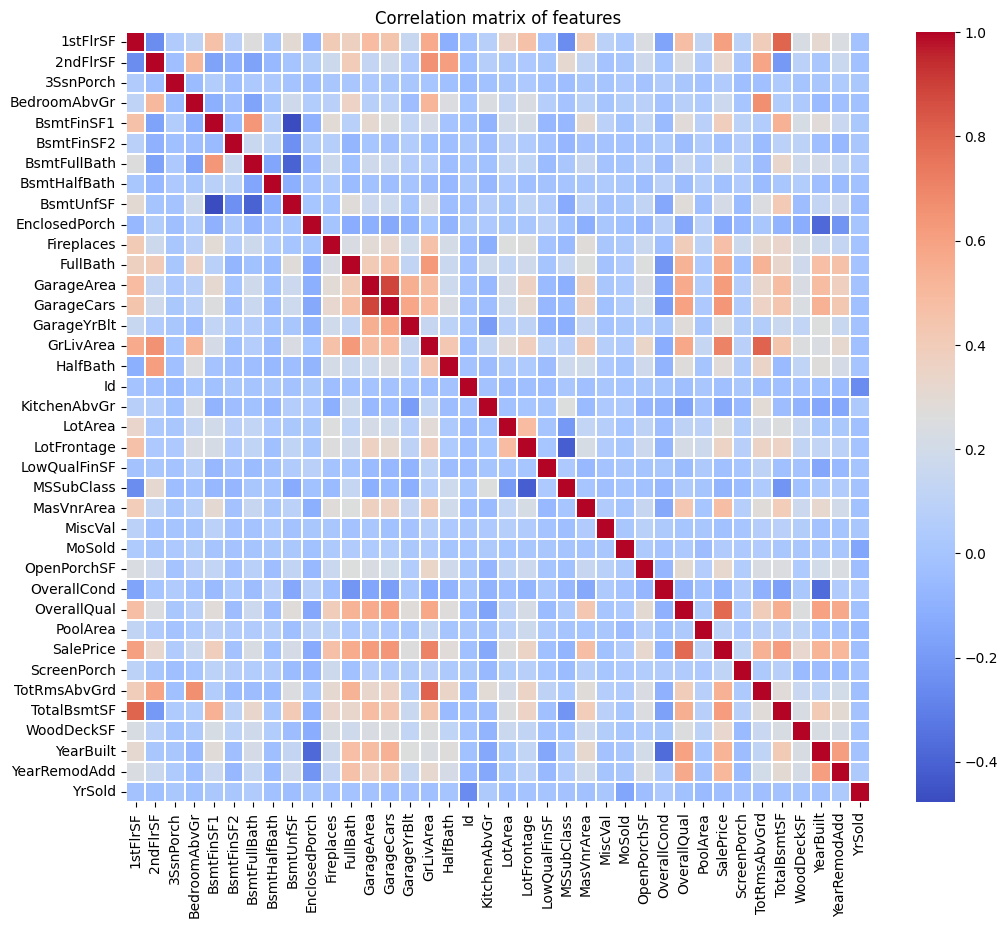

In [427]:
# Assuming df_all is your dataset
# Compute the correlation matrix of the dataset
corr_matrix = df_all.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation matrix of features')
plt.show()

In [428]:
# Assuming df_all is your dataset
# Compute the correlations of all variables with LotArea
corr_with_LotArea = df_all.corrwith(df_all['LotArea'],numeric_only=True)

# Print the correlations to the console
print(corr_with_LotArea)

1stFlrSF         0.332460
2ndFlrSF         0.031515
3SsnPorch        0.015995
BedroomAbvGr     0.132801
BsmtFinSF1       0.194031
BsmtFinSF2       0.084059
BsmtFullBath     0.128349
BsmtHalfBath     0.026292
BsmtUnfSF        0.021362
EnclosedPorch    0.020974
Fireplaces       0.261185
FullBath         0.125826
GarageArea       0.213251
GarageCars       0.180434
GarageYrBlt      0.073762
GrLivArea        0.284519
HalfBath         0.034244
Id              -0.040746
KitchenAbvGr    -0.020854
LotArea          1.000000
LotFrontage      0.489896
LowQualFinSF     0.000554
MSSubClass      -0.201730
MasVnrArea       0.125596
MiscVal          0.069029
MoSold           0.004156
OpenPorchSF      0.104797
OverallCond     -0.035617
OverallQual      0.100541
PoolArea         0.093708
SalePrice        0.263843
ScreenPorch      0.054375
TotRmsAbvGrd     0.213802
TotalBsmtSF      0.254138
WoodDeckSF       0.158045
YearBuilt        0.024128
YearRemodAdd     0.021612
YrSold          -0.024234
dtype: float

LotArea seems to have a good correlation so we will use that to fill the LotFrontage

In [429]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df_all is your dataset
# Create a copy of the dataset
df = df_all.copy()

# Drop missing values in LotFrontage
df_no_missing = df.dropna(subset=['LotFrontage'])

# Fit a linear regression model to predict LotFrontage based on LotArea
X = df_no_missing[['LotArea']]
y = df_no_missing['LotFrontage']
model = LinearRegression()
model.fit(X, y)

# Use the model to predict missing values in LotFrontage
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = model.predict(df[df['LotFrontage'].isnull()][['LotArea']])

In [430]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
KitchenQual        1
MSZoning           4
MasVnrArea        23
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


#Before trying to fix any more missing values let us try to transform the categorical features into labels so that we can check all the correlation of the features with the target variable.


In [431]:
import pandas as pd

# Assuming df_train is your dataset
for column in df_train.columns:
    if df[column].dtype == 'object' :
        num_unique = df[column].unique()
        print(f"Categorical {column}:")
        print(df[column].unique()[:10])
        print("...")


Categorical MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
...
Categorical Street:
['Pave' 'Grvl']
...
Categorical Alley:
['NA' 'Grvl' 'Pave']
...
Categorical LotShape:
['Reg' 'IR1' 'IR2' 'IR3']
...
Categorical LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']
...
Categorical Utilities:
['AllPub' 'NoSeWa' nan]
...
Categorical LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
...
Categorical LandSlope:
['Gtl' 'Mod' 'Sev']
...
Categorical Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']
...
Categorical Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
...
Categorical Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
...
Categorical BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
...
Categorical HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
...
Categorical RoofStyle:
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
...
Categorical RoofM

In [432]:
import pandas as pd

# Assuming df_train is your dataset
for column in df_train.columns:
    if df_train[column].dtype != 'object' and column not in ['Id','YearBuilt','YearRemodAdd','YrSold','']:
        num_unique = df_train[column].unique()
        if np.max(num_unique) > 20:
            print(f"Continuous {column}:")
            print(df_train[column].unique()[:10])
            print("...")
        else:
            print(f"Ordinal{column}:")
            print(df_train[column].unique()[:10])

Continuous MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85]
...
OrdinalLotFrontage:
[65. 80. 68. 60. 84. 85. 75. nan 51. 50.]
Continuous LotArea:
[ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]
...
OrdinalOverallQual:
[ 7  6  8  5  9  4 10  3  1  2]
OrdinalOverallCond:
[5 8 6 7 4 2 3 9 1]
OrdinalMasVnrArea:
[196.   0. 162. 350. 186. 240. 286. 306. 212. 180.]
Continuous BsmtFinSF1:
[ 706  978  486  216  655  732 1369  859    0  851]
...
Continuous BsmtFinSF2:
[  0  32 668 486  93 491 506 712 362  41]
...
Continuous BsmtUnfSF:
[150 284 434 540 490  64 317 216 952 140]
...
Continuous TotalBsmtSF:
[ 856 1262  920  756 1145  796 1686 1107  952  991]
...
Continuous 1stFlrSF:
[ 856 1262  920  961 1145  796 1694 1107 1022 1077]
...
Continuous 2ndFlrSF:
[ 854    0  866  756 1053  566  983  752 1142 1218]
...
Continuous LowQualFinSF:
[  0 360 513 234 528 572 144 392 371 390]
...
Continuous GrLivArea:
[1710 1262 1786 1717 2198 1362 1694 2090 1774 1077]
...
OrdinalBsmtFullBath:


In [433]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
cat_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])
        # Create a new dataframe with one-hot encoded columns
        #one_hot_encoded = pd.get_dummies(df[column], prefix=column, prefix_sep='_')
        # Drop the original column and add the one-hot encoded columns to df_train
        #df = df.drop(column, axis=1)
        #df = df.join(one_hot_encoded)
        cat_columns.append(column)

In [434]:
corr_with_HousePrices = df.corrwith(df['SalePrice']).abs()

# Print the correlations to the console
print(corr_with_HousePrices)
print(len(corr_with_HousePrices))

1stFlrSF         0.605852
2ndFlrSF         0.319334
3SsnPorch        0.044584
Alley            0.083121
BedroomAbvGr     0.168213
BldgType         0.085591
BsmtCond         0.091503
BsmtExposure     0.294589
BsmtFinSF1       0.386420
BsmtFinSF2       0.011378
BsmtFinType1     0.098734
BsmtFinType2     0.072717
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
BsmtQual         0.593734
BsmtUnfSF        0.214479
CentralAir       0.251328
Condition1       0.091155
Condition2       0.007513
Electrical       0.234716
EnclosedPorch    0.128578
ExterCond        0.117303
ExterQual        0.636884
Exterior1st      0.103551
Exterior2nd      0.103766
Fence            0.140640
FireplaceQu      0.097176
Fireplaces       0.466929
Foundation       0.382479
FullBath         0.560664
Functional       0.115328
GarageArea       0.623431
GarageCars       0.640409
GarageCond       0.246705
GarageFinish     0.425684
GarageQual       0.205963
GarageType       0.415283
GarageYrBlt      0.261366
GrLivArea   

In [435]:
# Select the columns that have a correlation above 0.1 with SalePrice
correlated_columns = list(corr_with_HousePrices[corr_with_HousePrices > 0.1].index)

df = df[correlated_columns + ['Id']]

In [436]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
BedroomAbvGr        0
BsmtExposure        0
BsmtFinSF1          1
BsmtFullBath        2
BsmtQual            0
BsmtUnfSF           1
CentralAir          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          1
GarageCars          1
GarageCond          0
GarageFinish        0
GarageQual          0
GarageType          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         0
LotArea             0
LotFrontage         0
LotShape            0
MSZoning            0
MasVnrArea         23
Neighborhood        0
OpenPorchSF         0
OverallQual         0
PavedDrive          0
PoolQC              0
RoofMatl            0
RoofStyle           0
SaleCondit

#Fixing the last missing values

In [437]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

BsmtFinSF1         1
BsmtFullBath       2
BsmtUnfSF          1
GarageArea         1
GarageCars         1
MasVnrArea        23
SalePrice       1459
TotalBsmtSF        1
dtype: int64


In [438]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Identify columns with missing values
missing_columns = list(df.columns[df.isnull().any()])
missing_columns.remove('SalePrice')

# Fill the missing values in each column
for col in missing_columns:
    print(col)
    max_value = df[col].max()
    if max_value > 20:
        # Use mode to fill the missing values
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    else:

        mode = df[col].mode().iloc[0]
        print("mode",mode)
        df[col].fillna(mode, inplace=True)

BsmtFinSF1
BsmtFullBath
mode 0.0
BsmtUnfSF
GarageArea
GarageCars
mode 2.0
MasVnrArea
TotalBsmtSF


C:\Users\hbvs9\AppData\Local\Temp\ipykernel_13644\1941443223.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
C:\Users\hbvs9\AppData\Local\Temp\ipykernel_13644\1941443223.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [439]:
cat_columns

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [440]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
cat_columns
for column in df:
    if column in cat_columns:
        #Create a new dataframe with one-hot encoded columns
        one_hot_encoded = pd.get_dummies(df[column], prefix=column, prefix_sep='_')
        # Drop the original column and add the one-hot encoded columns to df_train
        df = df.drop(column, axis=1)
        df = df.join(one_hot_encoded)

In [441]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       ...
       'RoofStyle_2', 'RoofStyle_3', 'RoofStyle_4', 'RoofStyle_5',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=210)

Model fit

In [442]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

SalePrice    1459
dtype: int64


In [448]:
df_train,df_test = divide_df(df)

In [454]:
df_train.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       ...
       'RoofStyle_2', 'RoofStyle_3', 'RoofStyle_4', 'RoofStyle_5',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=210)

In [487]:
X = StandardScaler().fit_transform(df_train.drop(columns=['SalePrice','Id']))
y = df_train['SalePrice'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=['Id']))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (1460, 208)
y_train shape: (1460,)
X_test shape: (1459, 208)


In [473]:
output = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")